#### The 'NEISS' dataset contains some injury information. Dataset along with coding manual can be downloaded from website.
#### Feel free to explore and share with us any insights you may get from this dataset.

#### 1. What are the top three body parts most frequently represented in this dataset? What are the top three body parts that are least frequently represented?



## Name: Jianlei(John) Sun



In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# load all the datasets
bodyParts = pd.read_excel('./data_HW3/BodyParts.xlsx')
diagnosisCodes = pd.read_excel('./data_HW3/DiagnosisCodes.xlsx')
disposition = pd.read_excel('./data_HW3/Disposition.xlsx')
NEISS2014 = pd.read_excel('./data_HW3/NEISS2014.xlsx')

In [72]:
# retrieve rankings of the frequency of body parts

topThree = NEISS2014.body_part.value_counts().index[0:3]
lastFive = NEISS2014.body_part.value_counts().index[-5:]

# build dictionary from dataframe
dict_bodyParts = {bodyParts['Code'][i]:bodyParts['BodyPart'][i] for i in range(len(bodyParts))}

print('The top three body parts most frequently represented are:','\n')
for i in topThree.values:
    print(i, dict_bodyParts[i])

print('\nThe top three body parts least frequently represented are:', '\n')
for i in lastFive.values:
    print(i, dict_bodyParts[i])

The top three body parts most frequently represented are: 

75 Head
76 Face
92 Finger

The top three body parts least frequently represented are: 

80 Arm, upper
0 Internal
87 Not Recorded
38 Pubic region
84 25-50% of body


#### 2. How many injuries in this dataset involve a skateboard?
#### Of those injuries, what percentage were male and what percentage were female? What was the average age of someone injured in an incident involving a skateboard?

In [73]:
InjuriesSkate = NEISS2014[NEISS2014.narrative.str.contains('SKATEBOARD')]

# percentage of male involed in the skateboard-related injuries
print('The male percentage:', InjuriesSkate.groupby('sex').size()[1]/len(InjuriesSkate['sex']))
print('The female percentage:', InjuriesSkate.groupby('sex').size()[0]/len(InjuriesSkate['sex']))

The male percentage: 0.824034334764
The female percentage: 0.175965665236


In [74]:
# average age involed in the skateboard-related injuries
InjuriesSkate['age'].mean()

17.991416309012877

#### 3. What diagnosis had the highest hospitalization rate?
#### What diagnosis most often concluded with the individual leaving without being seen?
#### Briefly discuss your findings and any caveats you'd mention when discussing this data

In [75]:
disposition

,Disposition,Code
0,"Treated and released, or examined and released...",1
1,Treated and transferred to another hospital,2
2,Treated and admitted for hospitalization (with...,4
3,Held for observation (includes admitted for ob...,5
4,Left without being seen/Left against medical a...,6
5,"Fatality, including DOA, died in the ED",8
6,Not Recorded,9


In [76]:
diagHighHops = NEISS2014[NEISS2014['disposition'] == 4]['diag'].value_counts()

dict_diagnosisCodes = {diagnosisCodes['Code'][i]:diagnosisCodes['Diagnosis'][i] for i in range(len(diagnosisCodes))}

# The diagnosis with the highest hospitalization rate:
print('The diagnosis with the highest hospitalization rate:', dict_diagnosisCodes[diagHighHops.index[0]])

# NEISS2014.groupby(['disposition','diag']).agg({'disposition':'count'})

The diagnosis with the highest hospitalization rate: Fracture


In [77]:
diagHighleft = NEISS2014[NEISS2014['disposition'] == 6]['diag'].value_counts()

# The diagnosis with the highest hospitalization rate:
print('The diagnosis with the highest hospitalization rate:', dict_diagnosisCodes[diagHighleft.index[1]])

# NEISS2014.groupby(['disposition','diag']).agg({'disposition':'count'})

The diagnosis with the highest hospitalization rate: Laceration


#### 4. Visualize any existing relationship between age and reported injuries (open question)


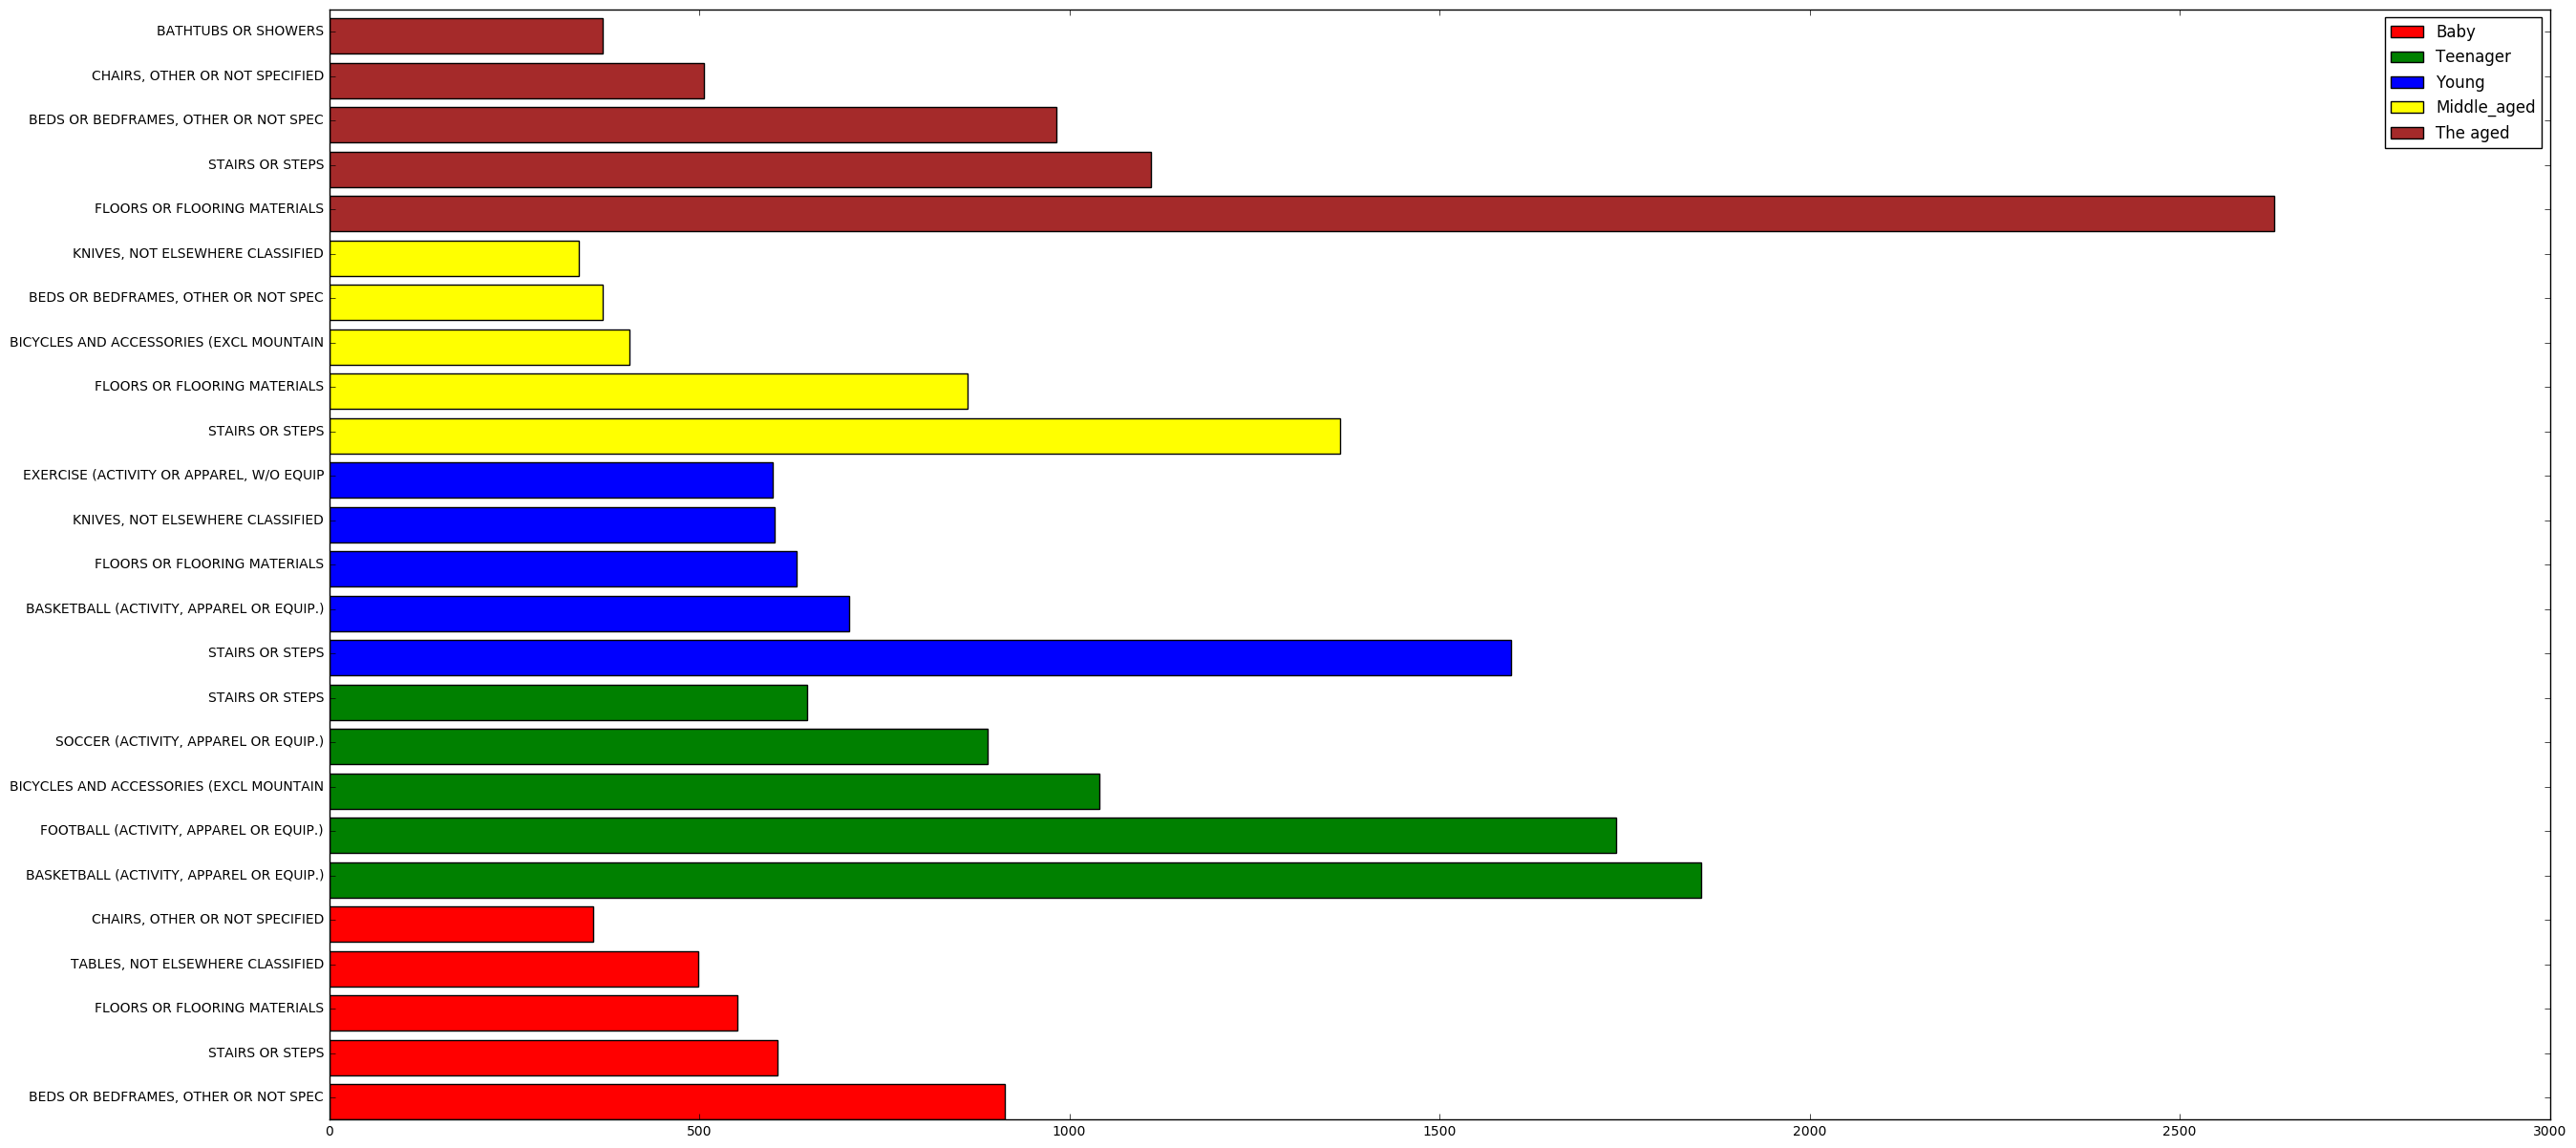

In [78]:
import warnings
warnings.filterwarnings('ignore')

# read in product code
product = pd.read_excel("./data_HW3/Product.xlsx")
product_dict = {product['Code'][i]:product['Product'][i] for i in range(len(product))}
NEISS2014['prod1'].replace(product_dict, inplace = True)

# define categories for different 'age' groups
NEISS2014['age1']=''
NEISS2014['age1'][(NEISS2014['age']>122) | (NEISS2014['age']<5)]='Baby-Infant'
NEISS2014['age1'][(NEISS2014['age']<=18) & (NEISS2014['age']>5)]='Teenager'
NEISS2014['age1'][(NEISS2014['age']<=40) & (NEISS2014['age']>18)]='Young'
NEISS2014['age1'][(NEISS2014['age']<=60) & (NEISS2014['age']>40)]='Middle-aged'
NEISS2014['age1'][(NEISS2014['age']<122) & (NEISS2014['age']>60)]='The aged'

# separate whole bar chart as several components and add them into the figure one by one 
fig = plt.figure(figsize=(30,15)) 

indexes = np.arange(5)

pos = np.arange(25)+0.5

plt.barh(indexes, NEISS2014['prod1'][NEISS2014['age1']=='Baby-Infant'].value_counts().values[:5], color = 'red', label = 'Baby')
plt.barh(indexes+5, NEISS2014['prod1'][NEISS2014['age1']=='Teenager'].value_counts().values[:5], color = 'green', label = 'Teenager')
plt.barh(indexes+10, NEISS2014['prod1'][NEISS2014['age1']=='Young'].value_counts().values[:5], color = 'blue', label = 'Young')
plt.barh(indexes+15, NEISS2014['prod1'][NEISS2014['age1']=='Middle-aged'].value_counts().values[:5], color = 'yellow', label = 'Middle_aged')
plt.barh(indexes+20, NEISS2014['prod1'][NEISS2014['age1']=='The aged'].value_counts().values[:5], color = 'brown', label = 'The aged')

labels = list(NEISS2014['prod1'][NEISS2014['age1']=='Baby-Infant'].value_counts().index[:5]) \
        +list(NEISS2014['prod1'][NEISS2014['age1']=='Teenager'].value_counts().index[:5]) \
        +list(NEISS2014['prod1'][NEISS2014['age1']=='Young'].value_counts().index[:5]) \
        +list(NEISS2014['prod1'][NEISS2014['age1']=='Middle-aged'].value_counts().index[:5]) \
        +list(NEISS2014['prod1'][NEISS2014['age1']=='The aged'].value_counts().index[:5]) \
                
plt.yticks(pos, labels, rotation = 'horizontal')
legend = plt.legend()